In [1]:
from scipy.io import netcdf
import numpy as np
from pylab import clf, plot, show, floor, ceil, imshow
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline
#xlabel, ylabel, legend, savefig, colorbar, title, clim, pcolor, cm, contourf
import os
import csv
import sys
import glob
from netCDF4 import Dataset

from IPython.display import display, Math, Latex, Image
from mpl_toolkits.basemap import Basemap
import mpl_toolkits

sys.path.append('/noc/users/am8e13/PyNGL-1.4.0/lib/python2.7/site-packages/PyNGL/')
import Ngl
sys.path.append('/noc/users/am8e13/Python/')
import komod
sys.path.append('/noc/users/am8e13/Python/PyNIO-1.4.0/')
import Nio

from python_functions import *
import random
import calendar

from IPython.html.widgets import interact, interactive
from IPython.display import clear_output, display, HTML

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 30 days
:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
# Readomg the Nemo and Noaa file
Nemo25 = nemo()
Nemo25.read_nemo('25')
Noaa = noaa()
Noaa.read_noaa()

In [3]:
obcs = Obcs()
obcs.ReadData('/hpcdata/scratch/am8e13/cs_36km_tutorial/obcsdata/newdownloaded/',12,'_tempmod2',36)
woa = Woa()
phc = Phc()

/noc/users/am8e13/anaconda/lib/python2.7/site-packages/scipy/io/netcdf.py:287: RuntimeWarning: Cannot close a netcdf_file opened with mmap=True, when netcdf_variables or arrays referring to its data still exist. All data arrays obtained from such files refer directly to data on disk, and must be copied before the file can be cleanly closed. (See netcdf_file docstring for more information on mmap.)
  ), category=RuntimeWarning)


In [5]:
first_spinup = StateRead()
first_spinup.getPath('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_tempcorrobcs/results0/')
first_spinup.readData(range(270 + 72, 270 + 90,1))
first_spinup.baroCalc()
first_spinup.fluxCalc()
first_spinup.mxldepthread(range(12))
first_spinup.seaiceread(range(12))
first_spinup.title('Old spinup')

Data read from /hpcdata/scratch/am8e13/cs_36km_tutorial/run_tempcorrobcs/results0/


/noc/users/am8e13/anaconda/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:598: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


In [6]:
first_sponge = StateRead()
first_sponge.getPath('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge/results0/')
first_sponge.readData(range(1080-18,1080,1))
first_sponge.baroCalc()
first_sponge.fluxCalc()
first_sponge.mxldepthread(range(12))
first_sponge.seaiceread(range(12))
first_sponge.title('1m sponge')

Data read from /hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge/results0/


In [69]:
timescale_1year = StateRead()
timescale_1year.getPath('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge_timescale/results/')
timescale_1year.readData(range(1080-18,1080,1))
timescale_1year.baroCalc()
timescale_1year.fluxCalc()
#timescale_1year.mxldpethread(range(12))
#timescale_1year.seaiceread(range(12))
timescale_1year.title('1y Sponge')

Data read from /hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge_timescale/results/


In [71]:
nonscaled_obcs = StateRead()
nonscaled_obcs.getPath('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge_noscaled/results/')
nonscaled_obcs.readData(range(1080-18,1080,1))
nonscaled_obcs.baroCalc()
nonscaled_obcs.mxldepthread(range(12))
nonscaled_obcs.seaiceread(range(12))
nonscaled_obcs.fluxCalc()
nonscaled_obcs.title('Noscal Sponge')

Data read from /hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge_noscaled/results/


In [9]:
noseaice_run = StateRead()
noseaice_run.getPath('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_noice/results/')
noseaice_run.readData(range(1080-18,1080,1))
noseaice_run.baroCalc()
noseaice_run.mxldepthread(range(12))
noseaice_run.fluxCalc()
noseaice_run.title('Noseaice')

Data read from /hpcdata/scratch/am8e13/cs_36km_tutorial/run_noice/results/


In [10]:
barents,fram,bering,davis,arctic1,arctic2,arctic3,arctic4 = arctic_reg()

In [11]:
comp_data = {'first_spinup' : first_spinup , 'first_sponge' : first_sponge , 'noseaice_run' : noseaice_run ,\
            'nonscaled_obcs' : nonscaled_obcs , 'Noaa' : Noaa }

In [12]:
comp_data1 = {0 : first_spinup , 1 : first_sponge , 2 : noseaice_run , 3 : nonscaled_obcs , 4 : timescale_1year ,\
             5 : noseaice_run}

In [13]:
def plot_psi_arrow_tot():
    fig,axes = plt.subplots(2,3)
    vimin = -20
    vimax = 20
    ind = 0
    for ax in axes.flat:
        ax.set_title(comp_data1[ind].title)
        masked_array = np.ma.array(comp_data1[ind].psi_ave[:,:], mask=np.isnan(comp_data1[ind].psi_ave[:,:]))
        cmap= matplotlib.cm.seismic
        cmap.set_bad('grey',1.)
        ca = ax.imshow(masked_array,vmin = vimin, vmax = vimax, interpolation='nearest',cmap = cmap ,origin="upper")
        for x in range(len(comp_data1[ind].X)-1,1,-5):
            for y in range(len(comp_data1[ind].Y)-1,1,-5):
                ax.arrow(comp_data1[ind].X[x],comp_data1[ind].Y[y],comp_data1[ind].Uda[y,x]*80,comp_data1[ind].Vda[y,x]*80)
        cbar = fig.colorbar(ca,ax=ax )
        ind +=1
        fig.subplots_adjust(right=2.6,top=2.)
comp_data1 = {0 : first_spinup , 1 : first_sponge , 2 : noseaice_run , 3 : nonscaled_obcs , 4 : timescale_1year ,\
             5 : noseaice_run}

In [14]:
def plot_psi_arrow(data):
    fig,axes = plt.subplots(1,1)
    vimin = -20
    vimax = 20
    masked_array = np.ma.array(data.psi_ave[:,:], mask=np.isnan(data.psi_ave[:,:]))
    cmap= matplotlib.cm.seismic
    cmap.set_bad('grey',1.)
    ca = imshow(masked_array,vmin = vimin, vmax = vimax, interpolation='nearest',cmap = cmap ,origin="upper")
    for x in range(len(data.X)-1,1,-3):
        for y in range(len(data.Y)-1,1,-3):
            plt.arrow(data.X[x],data.Y[y],data.Uda[y,x]*60,data.Vda[y,x]*60)
    cbar = fig.colorbar(ca)
    fig.subplots_adjust(right=2.4,top=2.)

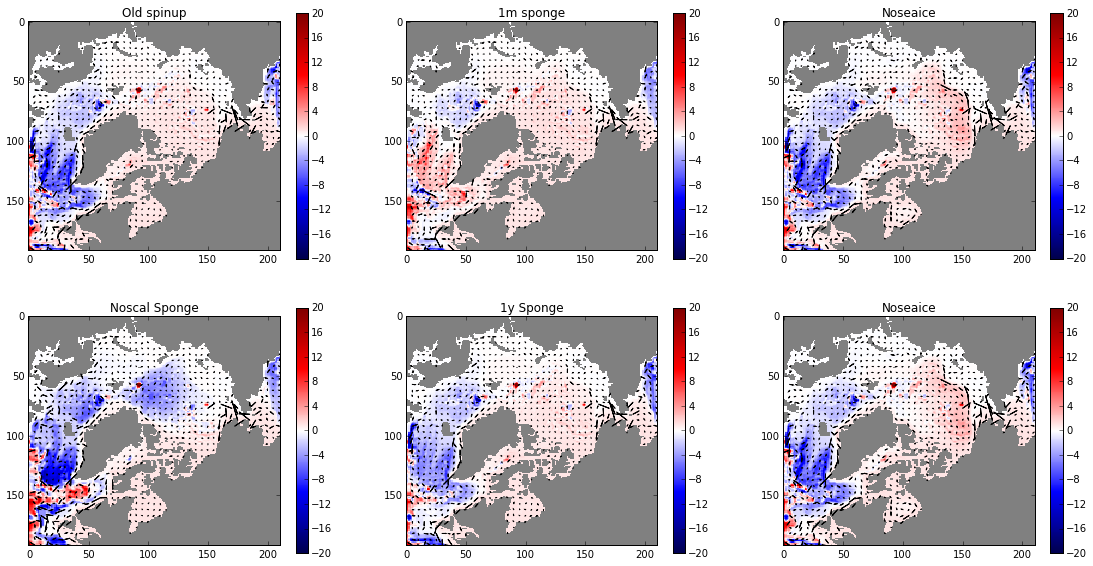

In [15]:
plot_psi_arrow_tot()

Average of the frist 55-60 years with no sponge on OBCS

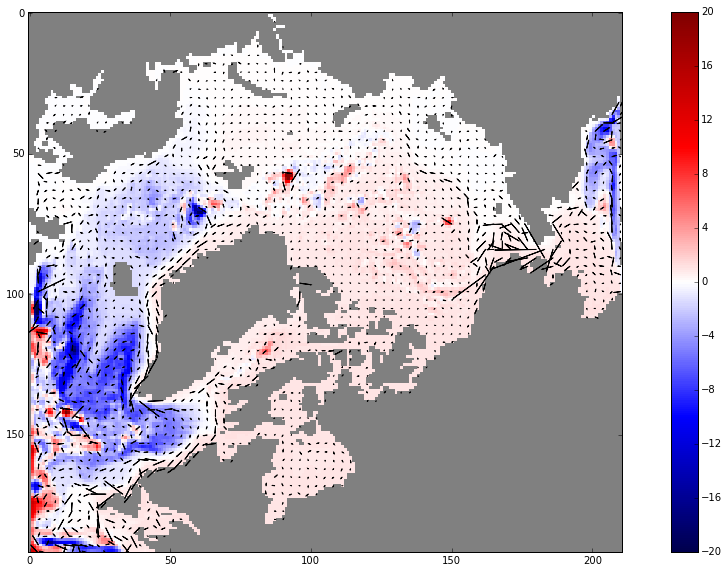

In [16]:
plot_psi_arrow(first_spinup)

Average of the frist 55-60 years with nonscaled obcs with sponge on OBCS

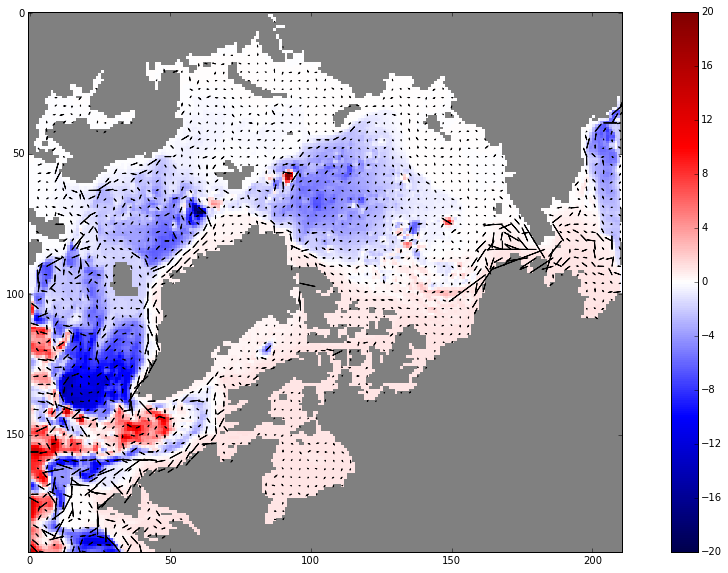

In [17]:
plot_psi_arrow(nonscaled_obcs)

Average of the frist 55-60 years with sponge 1 month timescale and scaled OBCS

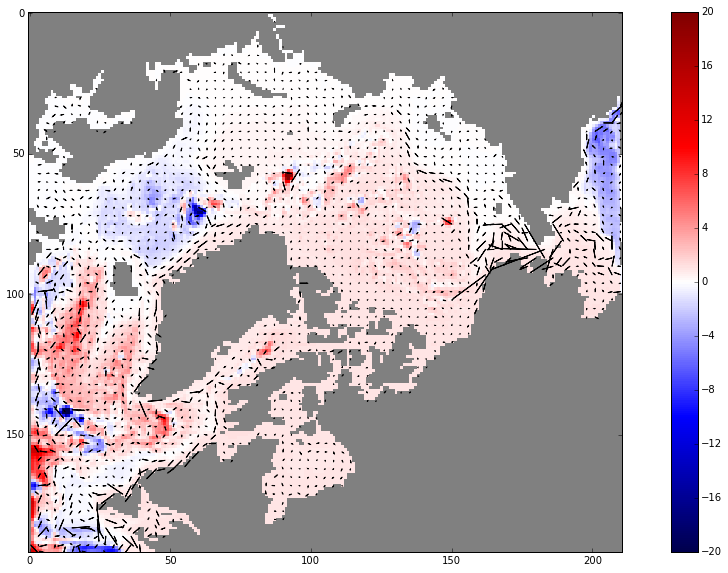

In [18]:
plot_psi_arrow(first_sponge)

Average of the frist 55-60 years with sponge 1 year timescale and scaled OBCS

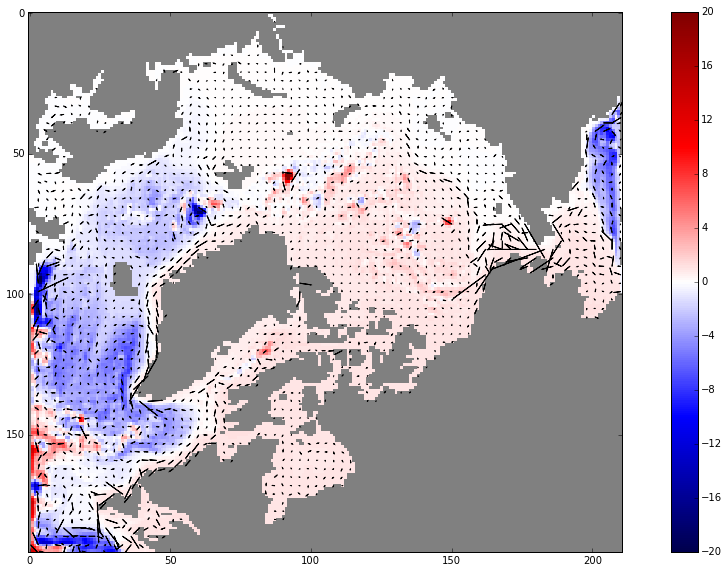

In [19]:
plot_psi_arrow(timescale_1year)

Average of the frist 55-60 years with no seaice

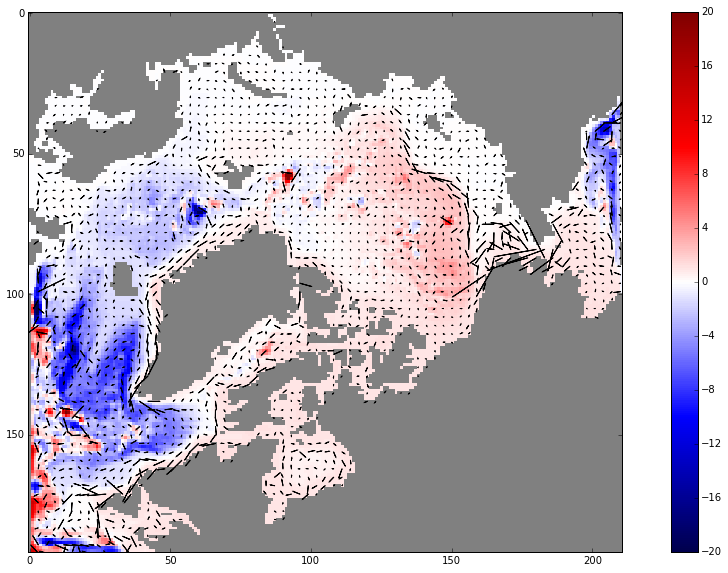

In [20]:
plot_psi_arrow(noseaice_run)

Fram strait

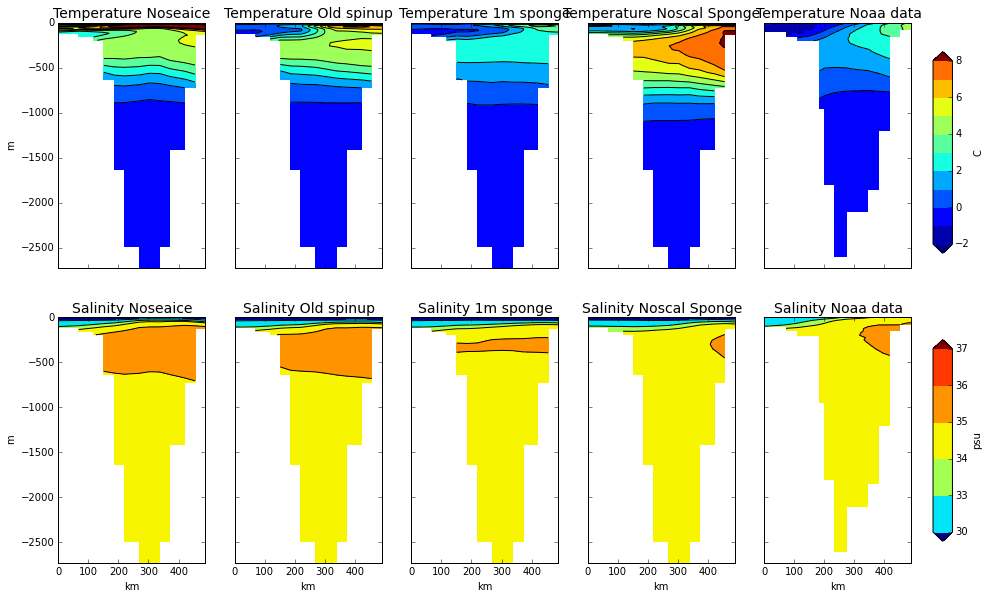

In [21]:
comp_plot(comp_data,fram)

Davis strait

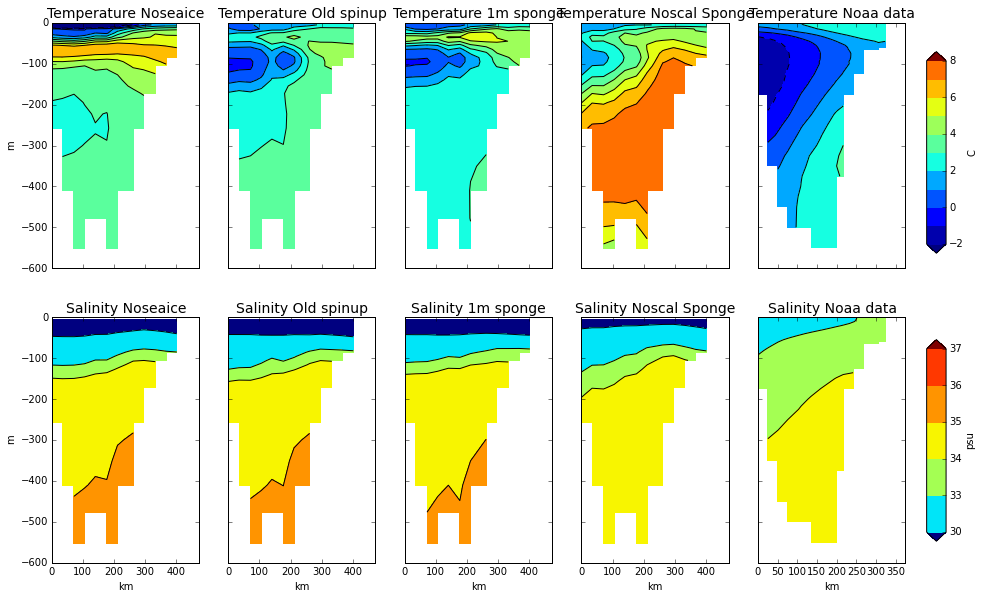

In [22]:
comp_plot(comp_data,davis)

Barents strait

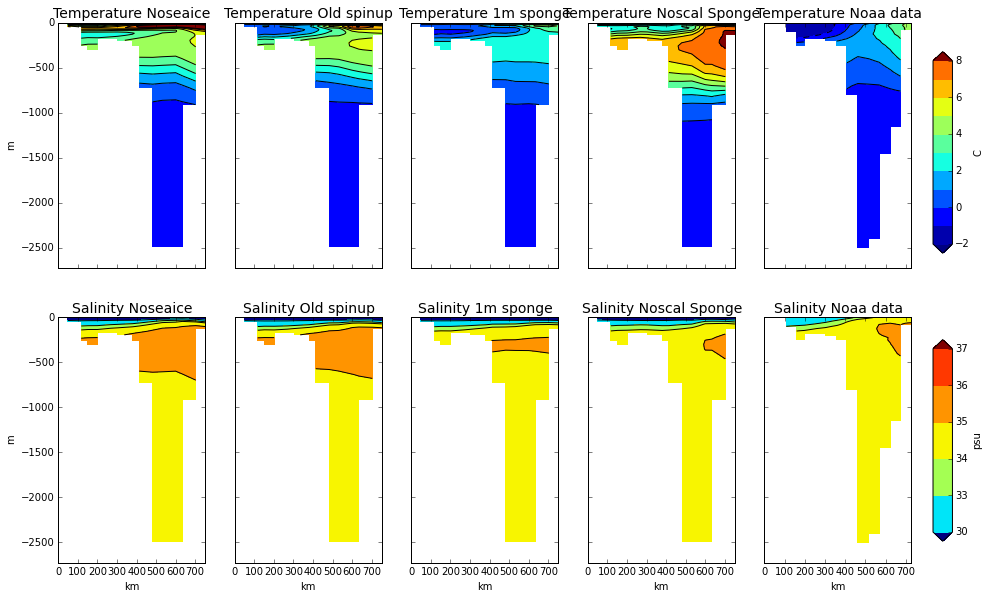

In [23]:
comp_plot(comp_data,barents)

Bering strait

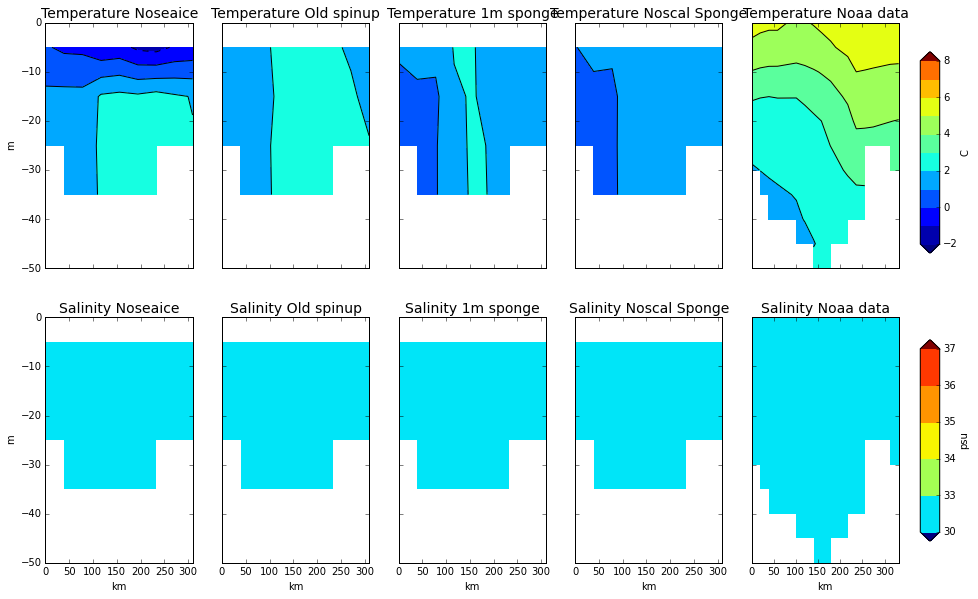

In [24]:
comp_plot(comp_data,bering)

Arctic 1

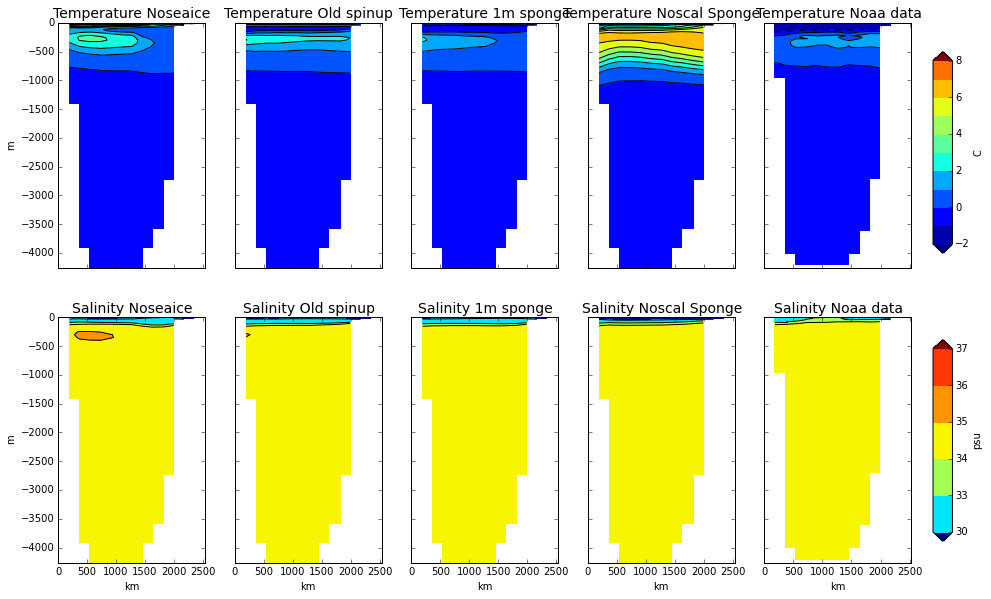

In [25]:
comp_plot(comp_data,arctic1)

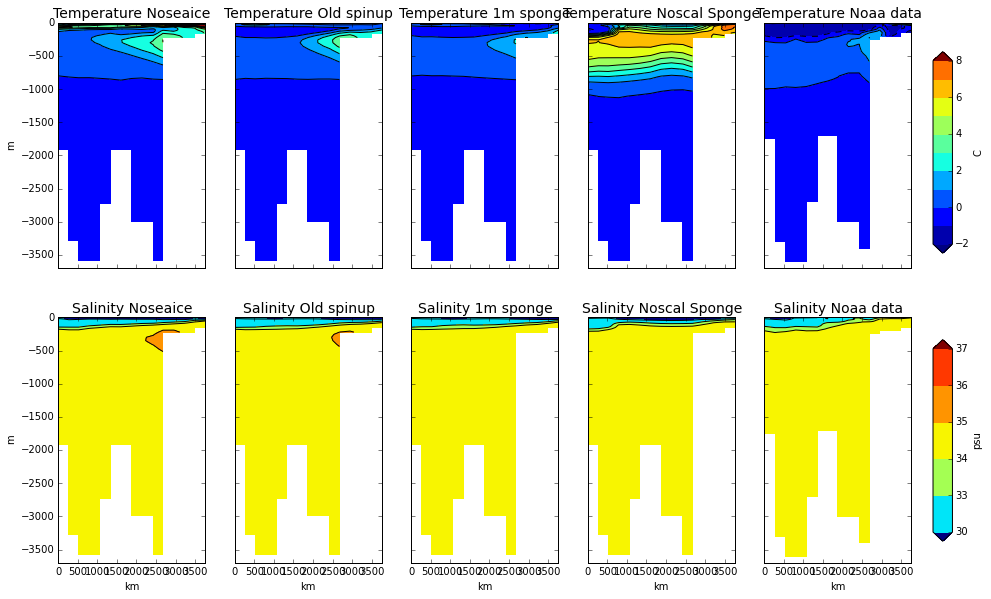

In [26]:
comp_plot(comp_data,arctic2)

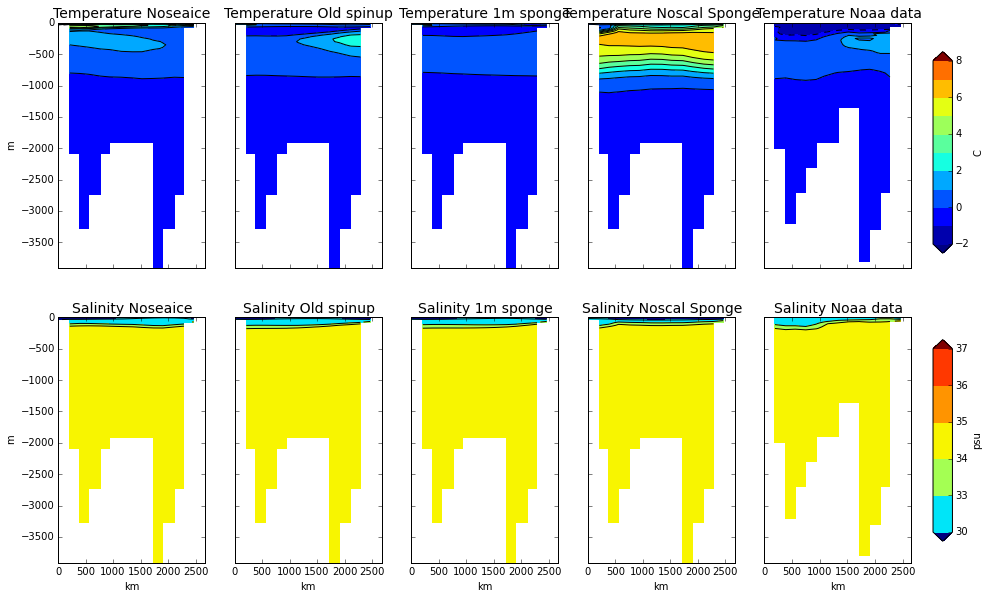

In [27]:
comp_plot(comp_data,arctic3)

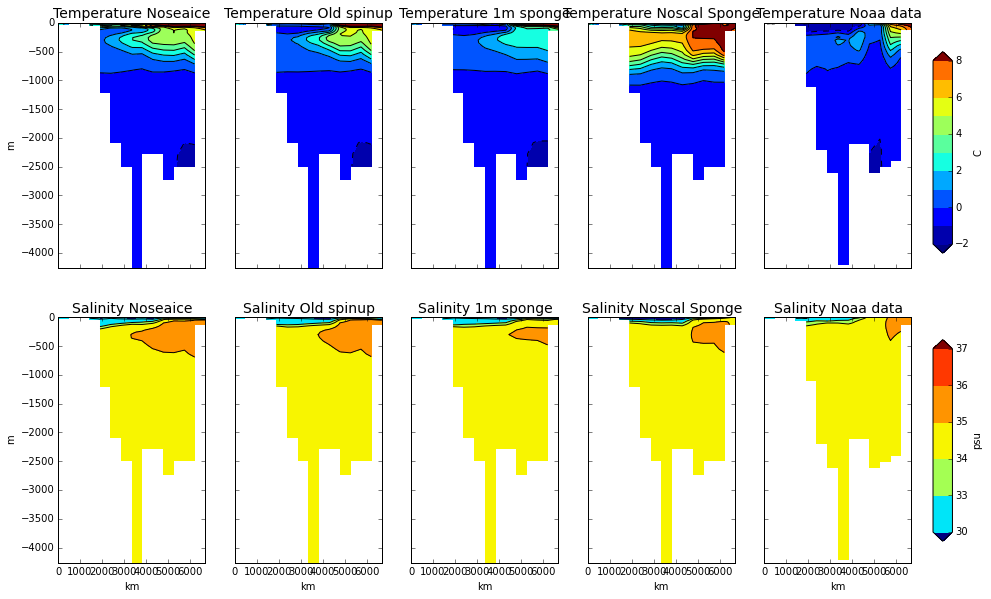

In [28]:
comp_plot(comp_data,arctic4)

In [29]:
liq10,core2,obs = lit_data();
for var in ['Barents','Bering','Fram','Davis']:
    print var
    print 'first ',first_spinup.totalFluxes[var]
    print 'spong ',first_sponge.totalFluxes[var]
    print 'noscal',nonscaled_obcs.totalFluxes[var]
    print 'noice ',noseaice_run.totalFluxes[var]
    print 'liq10 ',liq10[var]
    print 'Core2 ',core2[var]
    print 'obsv  ',obs[var]

Barents
first  {'Outflow': -0.7, 'Total flow': 0.09, 'Inflow': 0.79}
spong  {'Outflow': -0.77, 'Total flow': -0.05, 'Inflow': 0.72}
noscal {'Outflow': -1.05, 'Total flow': -0.53, 'Inflow': 0.52}
noice  {'Outflow': -0.87, 'Total flow': -0.08, 'Inflow': 0.8}
liq10  {'Outflow': 4.1, 'Total flow': 2.9, 'Inflow': -1.2}
Core2  {'Outflow': [], 'Total flow': 2.53, 'Inflow': []}
obsv   {'Outflow': 4.1, 'Total flow': '2-2.3', 'Inflow': -1.2}
Bering
first  {'Outflow': -0.02, 'Total flow': 1.07, 'Inflow': 1.1}
spong  {'Outflow': -0.02, 'Total flow': 1.07, 'Inflow': 1.09}
noscal {'Outflow': -0.02, 'Total flow': 1.07, 'Inflow': 1.09}
noice  {'Outflow': -0.04, 'Total flow': 1.07, 'Inflow': 1.11}
liq10  {'Outflow': 0.0, 'Total flow': 1.3, 'Inflow': 1.3}
Core2  {'Outflow': [], 'Total flow': 0.99, 'Inflow': []}
obsv   {'Outflow': [], 'Total flow': '0.8+/-0.2', 'Inflow': []}
Fram
first  {'Outflow': -1.76, 'Total flow': 0.09, 'Inflow': 1.85}
spong  {'Outflow': -1.23, 'Total flow': 0.18, 'Inflow': 1.42}
no

Time evolution of the first spin up no sponge at surface

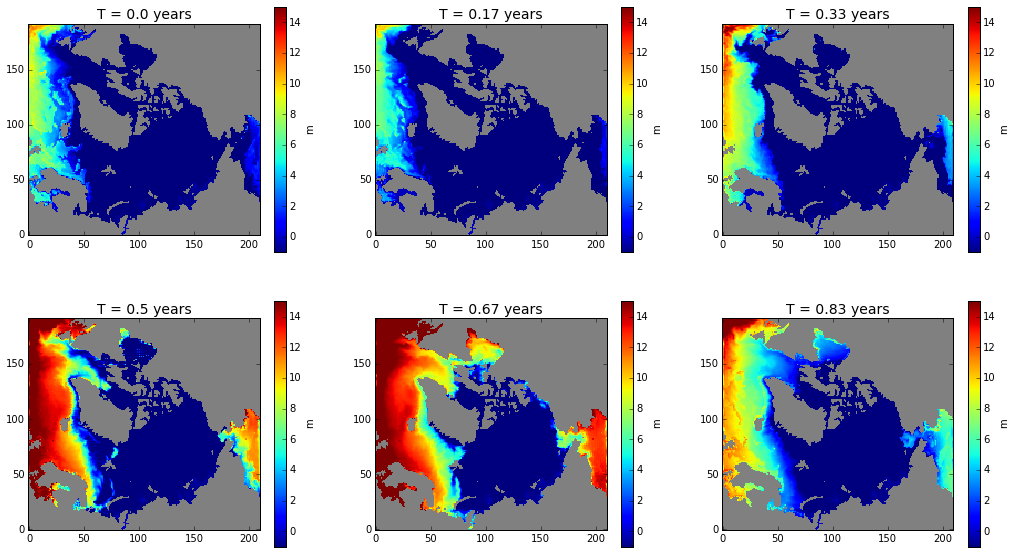

In [30]:
plot_field(first_spinup.data['T'][[0,3,6,9,12,15],0,:,:],first_spinup.years[[0,3,6,9,12,15]],-1,15,matplotlib.cm.jet,'grey','m',row=2,col=3)  

Time evolution of the spin up with sponge at surface

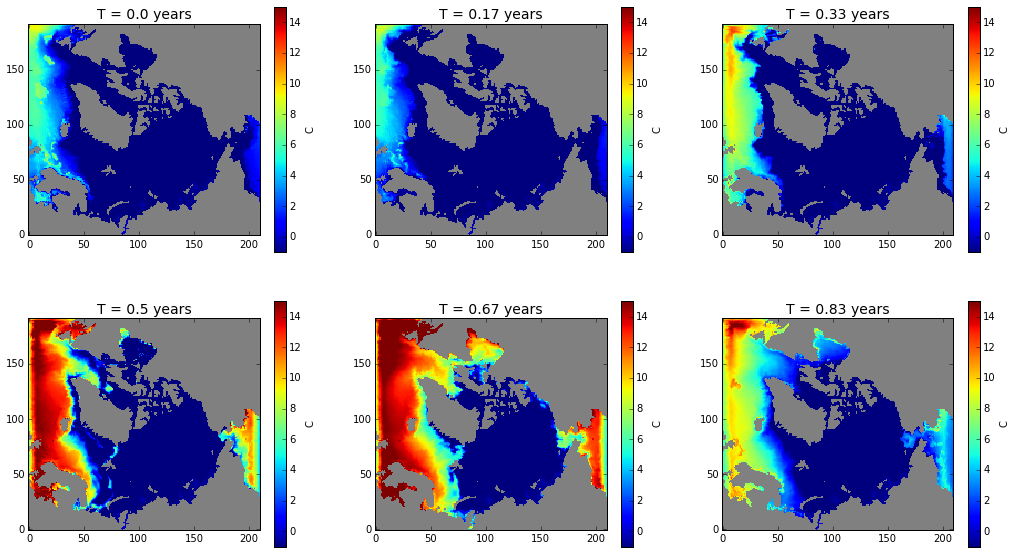

In [31]:
plot_field(first_sponge.data['T'][[0,3,6,9,12,15],0,:,:],first_spinup.years[[0,3,6,9,12,15]],-1,15,matplotlib.cm.jet,'grey','C',row=2,col=3)  

Time evolution of the spin up with sponge and nonscaled OBCS at surface

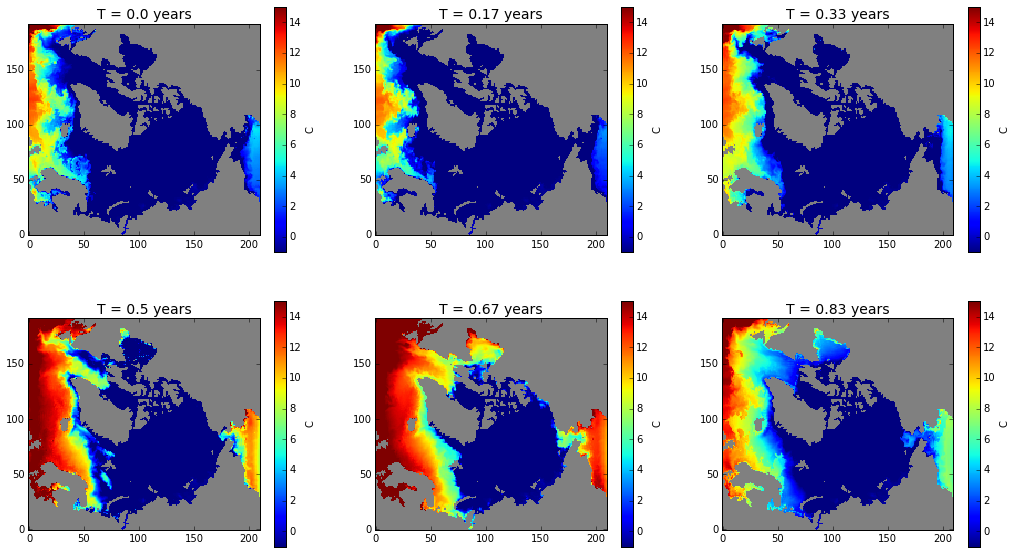

In [32]:
plot_field(nonscaled_obcs.data['T'][[0,3,6,9,12,15],0,:,:],first_spinup.years[[0,3,6,9,12,15]],-1,15,matplotlib.cm.jet,'grey','C',row=2,col=3)  

Time evolution of the spin up with no seaice  at surface

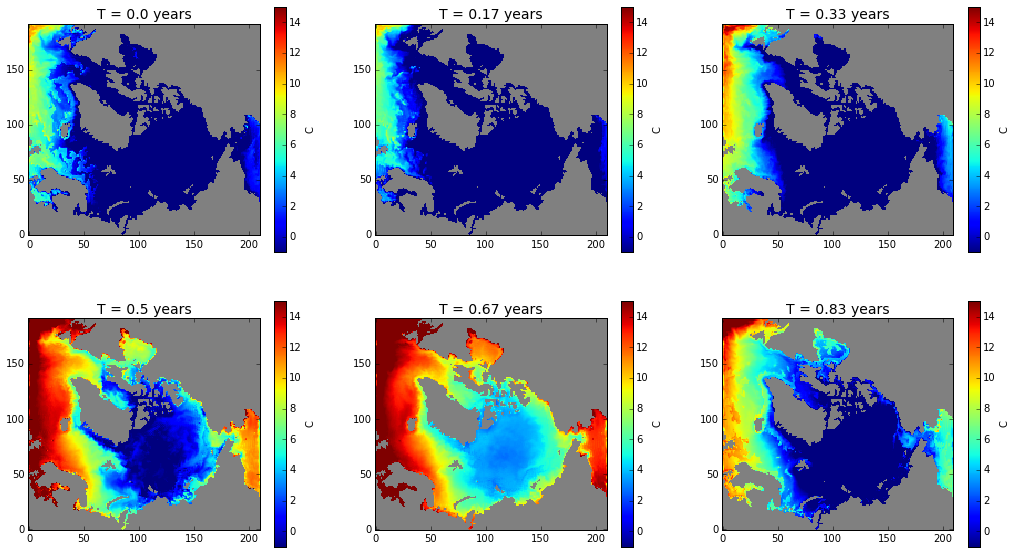

In [33]:
plot_field(noseaice_run.data['T'][[0,3,6,9,12,15],0,:,:],first_spinup.years[[0,3,6,9,12,15]],-1,15,matplotlib.cm.jet,'grey','C',row=2,col=3)  

Time evolution of the first spin up no sponge at 200 m

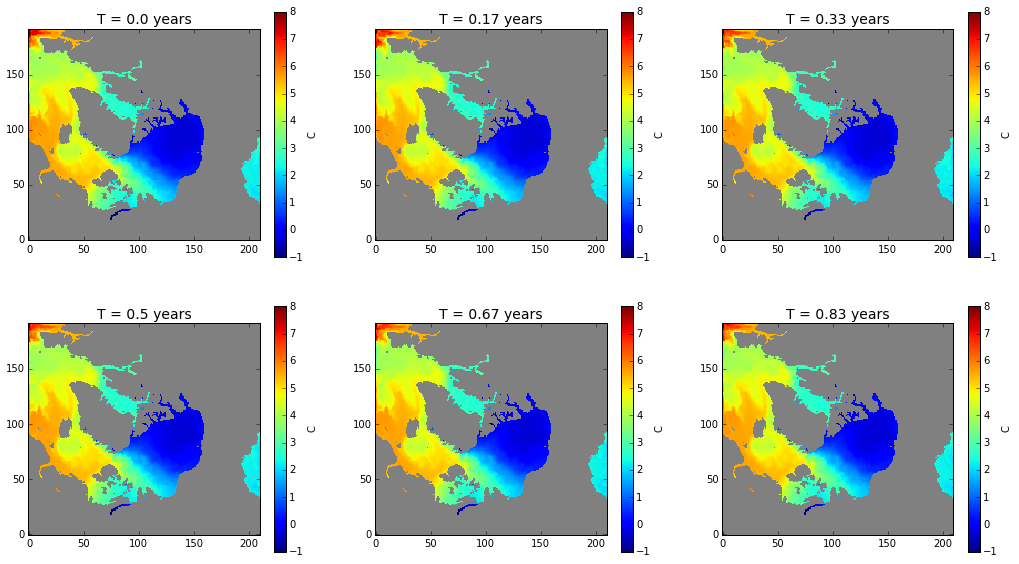

In [34]:
plot_field(first_spinup.data['T'][[0,3,6,9,12,15],16,:,:],first_spinup.years[[0,3,6,9,12,15]],-1,8,matplotlib.cm.jet,'grey','C',row=2,col=3)  

Time evolution of the spin up with sponge at 200 m

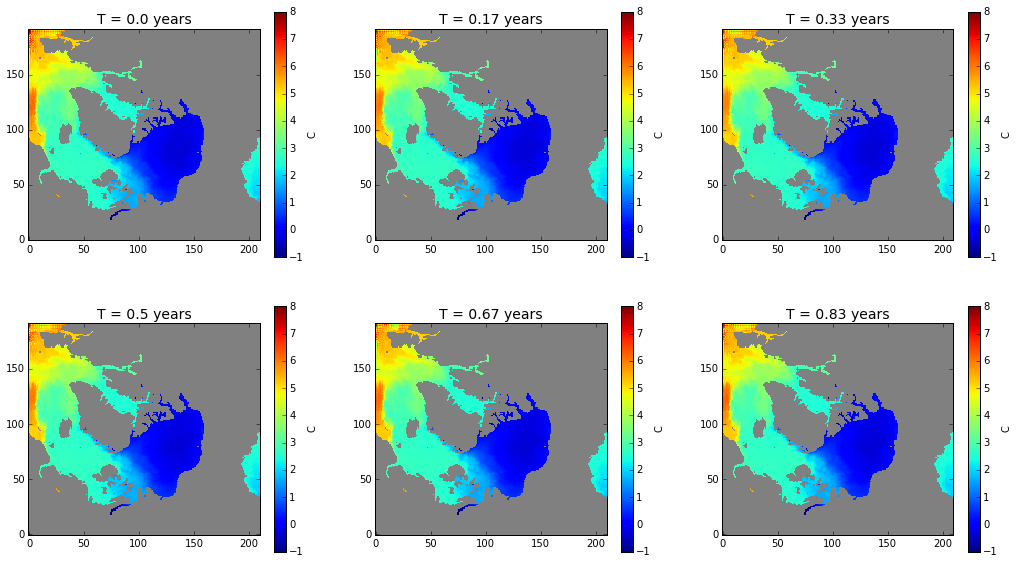

In [35]:
plot_field(first_sponge.data['T'][[0,3,6,9,12,15],16,:,:],first_spinup.years[[0,3,6,9,12,15]],-1,8,matplotlib.cm.jet,'grey','C',row=2,col=3)  

Time evolution of the spin up with sponge and nonscaled OBCS at 200 m

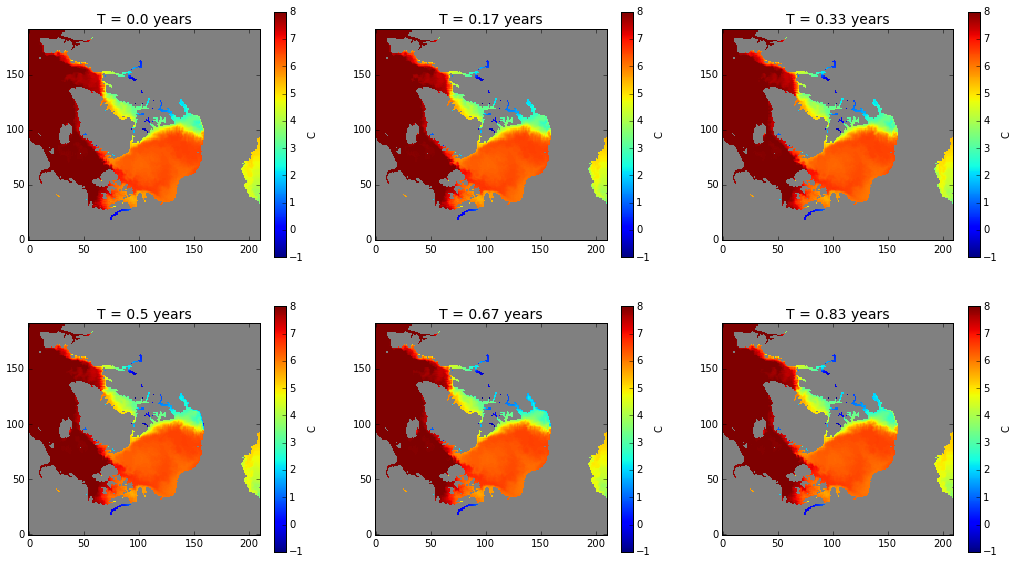

In [36]:
plot_field(nonscaled_obcs.data['T'][[0,3,6,9,12,15],16,:,:],first_spinup.years[[0,3,6,9,12,15]],-1,8,matplotlib.cm.jet,'grey','C',row=2,col=3)  

Time evolution of the spin up with no seaice at 200 m

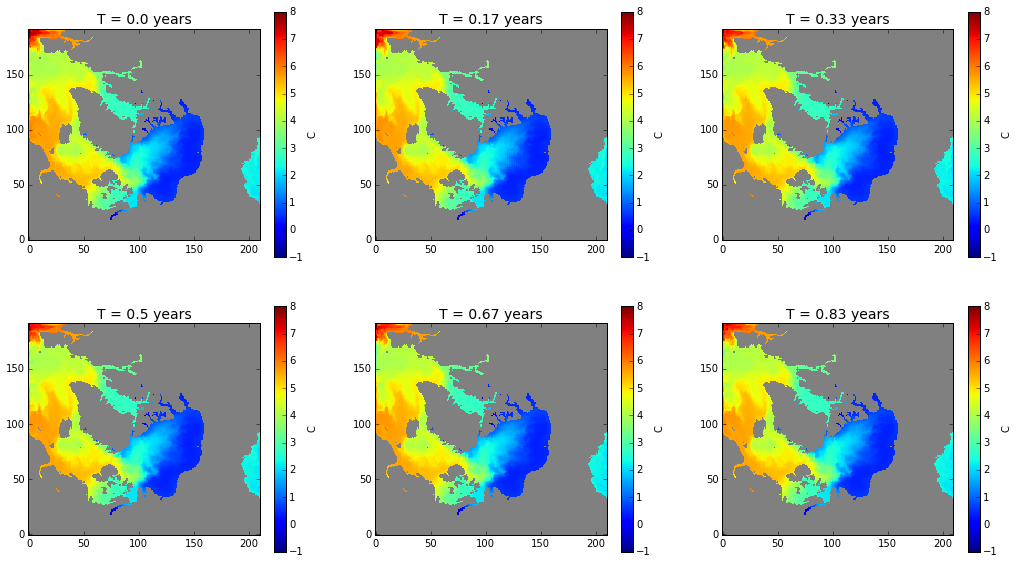

In [37]:
plot_field(noseaice_run.data['T'][[0,3,6,9,12,15],16,:,:],first_spinup.years[[0,3,6,9,12,15]],-1,8,matplotlib.cm.jet,'grey','C',row=2,col=3)  

Time evolution of the first spin up no sponge Mixdel layer depth

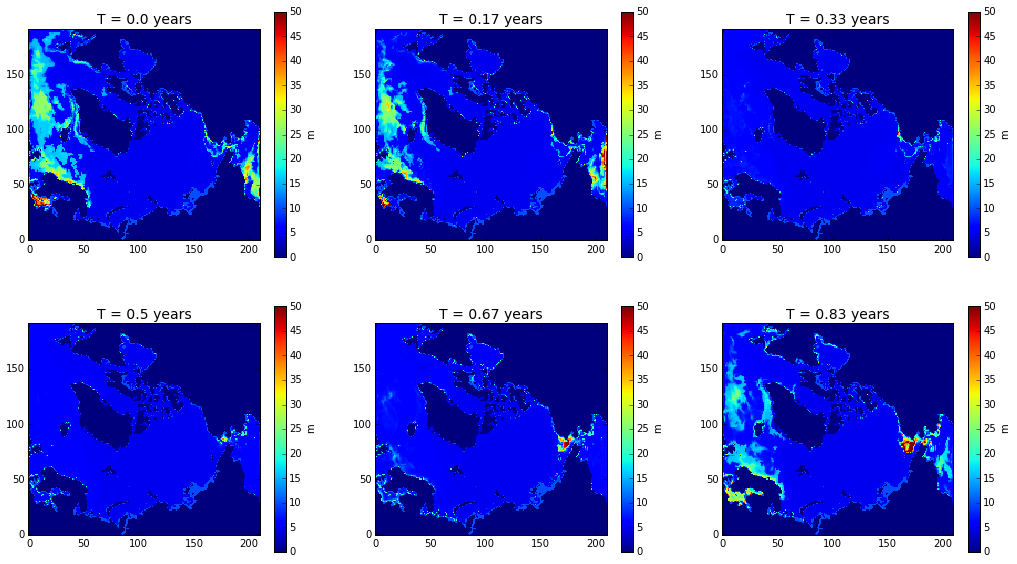

In [38]:
plot_field(first_spinup.mxldepth[[0,2,4,6,8,10],0,:,:],first_spinup.years[[0,3,6,9,12,15]],0,50,matplotlib.cm.jet,'grey','m',row=2,col=3)  

Time evolution of the spin up with sponge layer depth

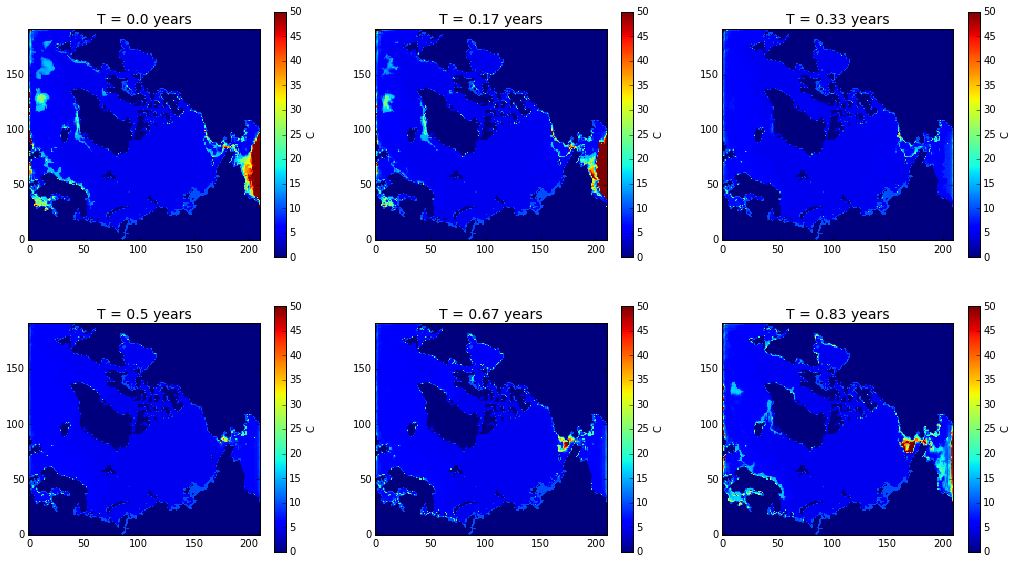

In [39]:
plot_field(first_sponge.mxldepth[[0,2,4,6,8,10],0,:,:],first_spinup.years[[0,3,6,9,12,15]],0,50,matplotlib.cm.jet,'grey','C',row=2,col=3)  

Time evolution of the spin up with sponge and nonscaled OBCS at 200 m

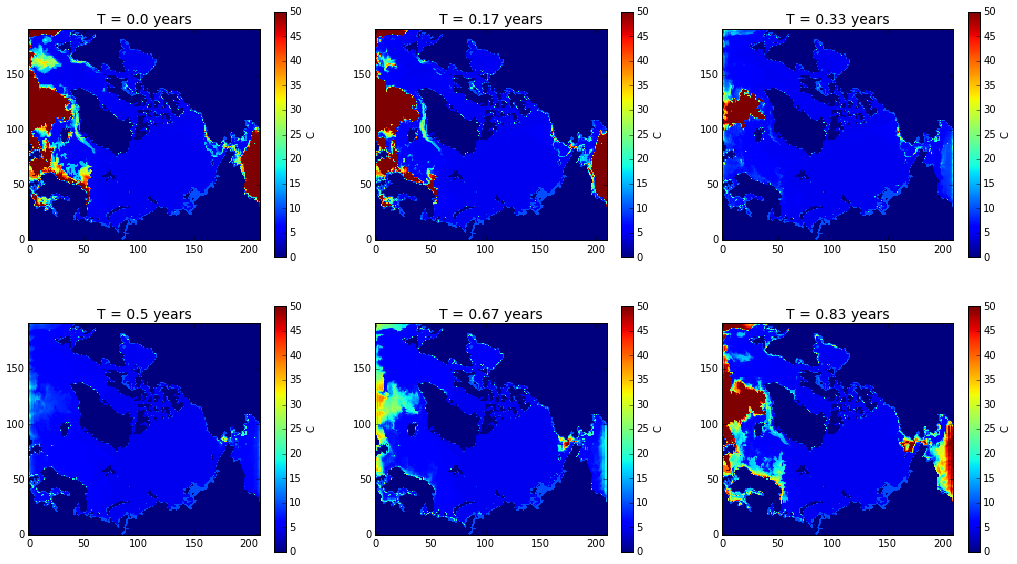

In [40]:
plot_field(nonscaled_obcs.mxldepth[[0,2,4,6,8,10],0,:,:],first_spinup.years[[0,3,6,9,12,15]],0,50,matplotlib.cm.jet,'grey','C',row=2,col=3)  

Time evolution of the spin up with no seaice Mixdel layer depth

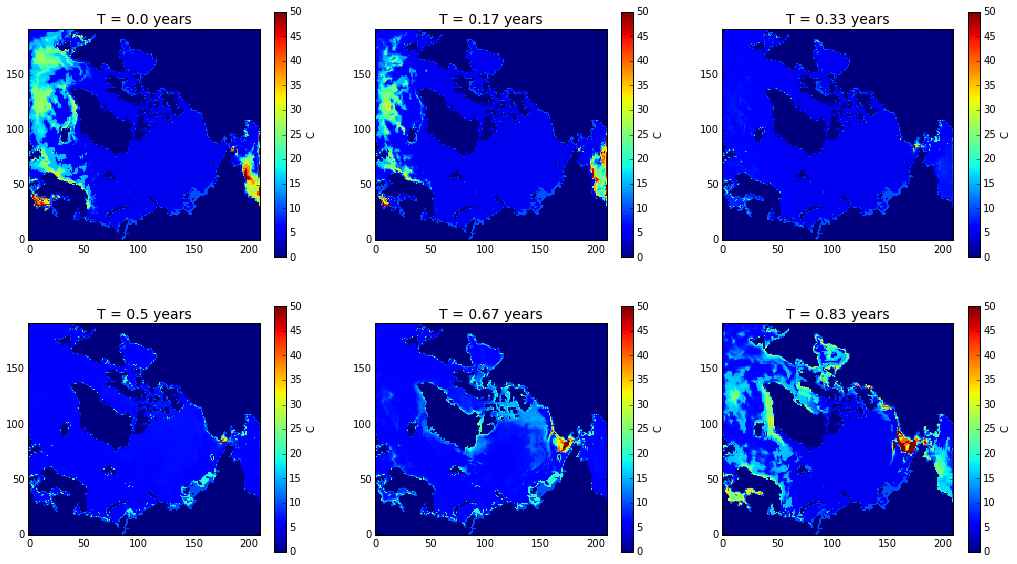

In [41]:
plot_field(noseaice_run.mxldepth[[0,2,4,6,8,10],0,:,:],first_spinup.years[[0,3,6,9,12,15]],0,50,matplotlib.cm.jet,'grey','C',row=2,col=3)  

Time evolution of the first spin up no sponge seice extent

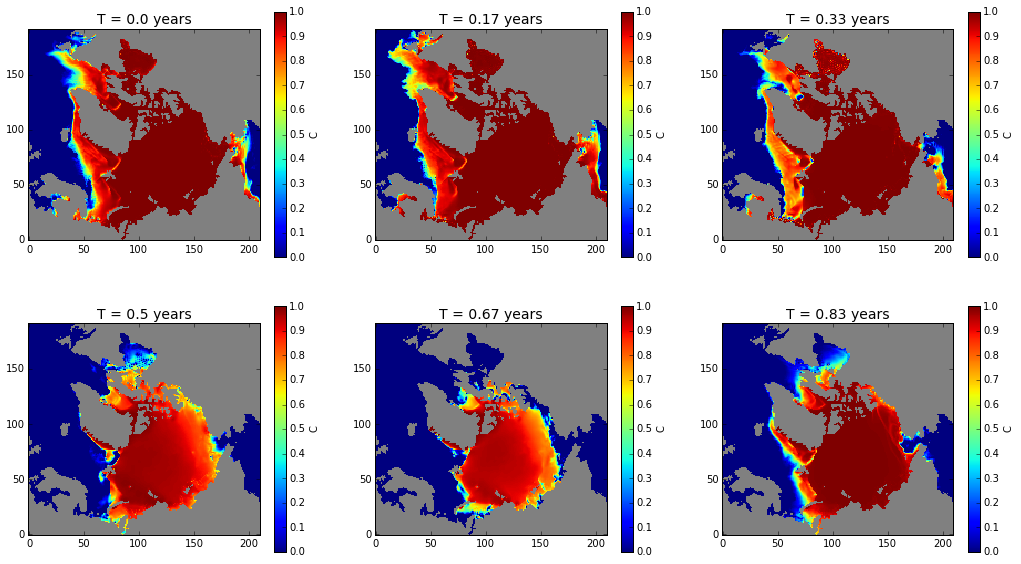

In [42]:
plot_field(first_spinup.seaice['SIarea'][[0,2,4,6,8,10],0,:,:],first_spinup.years[[0,3,6,9,12,15]],0,1,matplotlib.cm.jet,'grey','C',row=2,col=3)  

Time evolution of the spin up with sponge layer depth

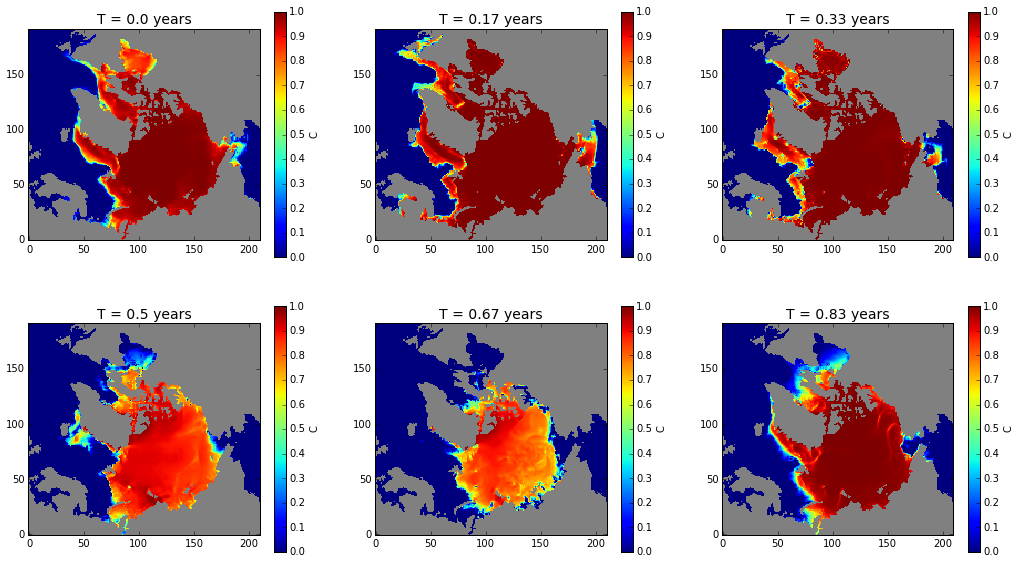

In [43]:
plot_field(first_sponge.seaice['SIarea'][[0,2,4,6,8,10],0,:,:],first_spinup.years[[0,3,6,9,12,15]],0,1,matplotlib.cm.jet,'grey','C',row=2,col=3)  

Time evolution of the spin up with sponge and nonscaled OBCS at 200 m

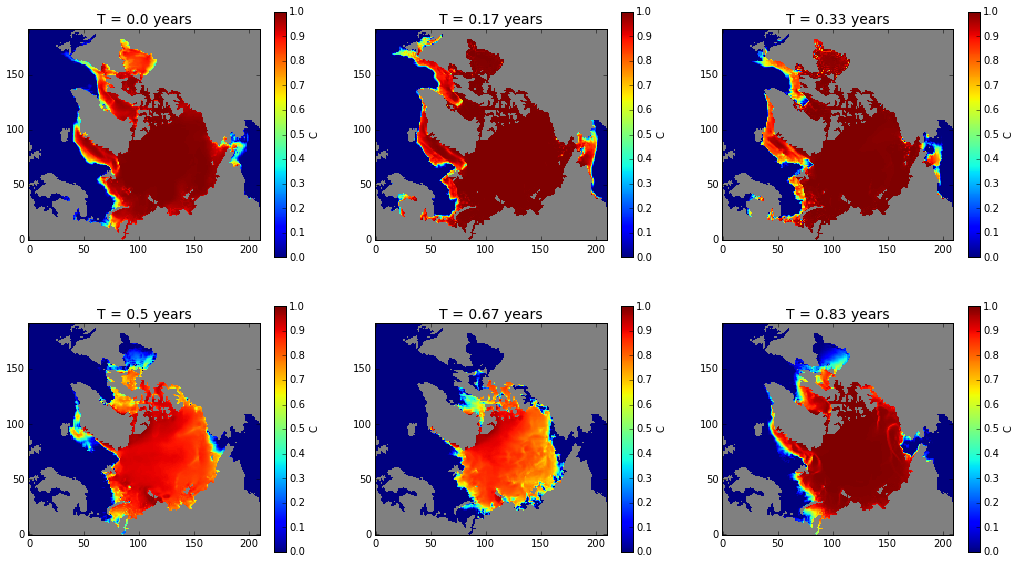

In [44]:
plot_field(nonscaled_obcs.seaice['SIarea'][[0,2,4,6,8,10],0,:,:],first_spinup.years[[0,3,6,9,12,15]],0,1,matplotlib.cm.jet,'grey','C',row=2,col=3)  

Temperatures in the experiments at surface

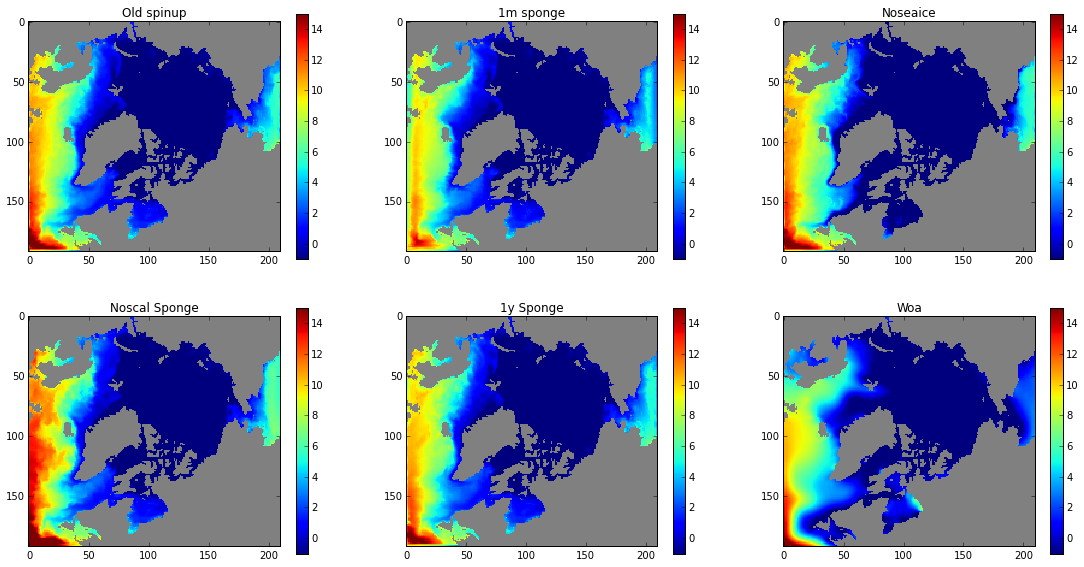

In [45]:
def plot_tot(comp):
    fig,axes = plt.subplots(2,3)
    vimin = -1
    vimax = 15
    ind = 0
    for ax in axes.flat:
        ax.set_title(comp[ind].title)
        masked_array = np.ma.array(comp[ind].T[0,:,:], mask=np.isnan(comp[ind].T[0,:,:]))
        cmap= matplotlib.cm.jet
        cmap.set_bad('grey',1.)
        ca = ax.imshow(masked_array,vmin = vimin, vmax = vimax, interpolation='nearest',cmap = cmap ,origin="upper")
        cbar = fig.colorbar(ca,ax=ax )
        ind +=1
        fig.subplots_adjust(right=2.6,top=2.)
comp= {0 : first_spinup , 1 : first_sponge , 2 : noseaice_run , 3 : nonscaled_obcs , 4 : timescale_1year ,\
             5 : woa}
plot_tot(comp)

Temperatures in the experiments at 200 m

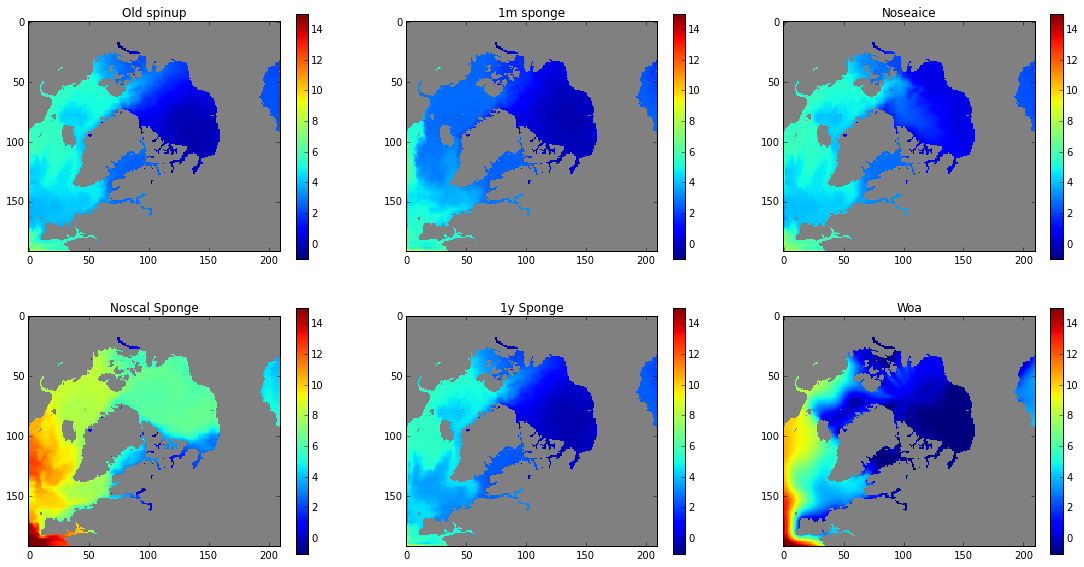

In [46]:
def plot_tot(comp):
    fig,axes = plt.subplots(2,3)
    vimin = -1
    vimax = 15
    ind = 0
    for ax in axes.flat:
        ax.set_title(comp[ind].title)
        masked_array = np.ma.array(comp[ind].T[16,:,:], mask=np.isnan(comp[ind].T[16,:,:]))
        cmap= matplotlib.cm.jet
        cmap.set_bad('grey',1.)
        ca = ax.imshow(masked_array,vmin = vimin, vmax = vimax, interpolation='nearest',cmap = cmap ,origin="upper")
        cbar = fig.colorbar(ca,ax=ax )
        ind +=1
        fig.subplots_adjust(right=2.6,top=2.)
comp= {0 : first_spinup , 1 : first_sponge , 2 : noseaice_run , 3 : nonscaled_obcs , 4 : timescale_1year ,\
             5 : woa}
plot_tot(comp)

Salinity in the experimets at surface

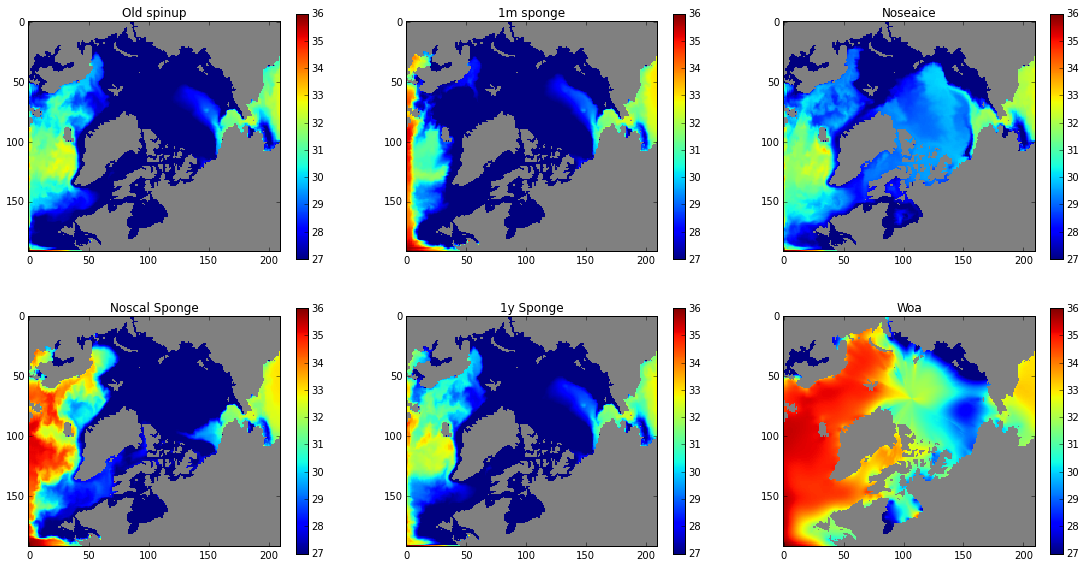

In [47]:
def plot_tot(comp):
    fig,axes = plt.subplots(2,3)
    vimin = 27
    vimax = 36
    ind = 0
    for ax in axes.flat:
        ax.set_title(comp[ind].title)
        masked_array = np.ma.array(comp[ind].S[0,:,:], mask=np.isnan(comp[ind].S[0,:,:]))
        cmap= matplotlib.cm.jet
        cmap.set_bad('grey',1.)
        ca = ax.imshow(masked_array,vmin = vimin, vmax = vimax, interpolation='nearest',cmap = cmap ,origin="upper")
        cbar = fig.colorbar(ca,ax=ax )
        ind +=1
        fig.subplots_adjust(right=2.6,top=2.)
comp= {0 : first_spinup , 1 : first_sponge , 2 : noseaice_run , 3 : nonscaled_obcs , 4 : timescale_1year ,\
             5 : woa}
plot_tot(comp)

Seaice of experiments

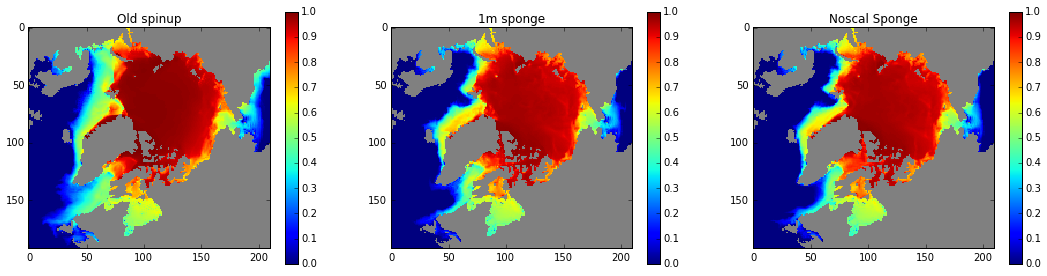

In [79]:
def plot_tot(comp):
    fig,axes = plt.subplots(1,3)
    vimin = 0
    vimax = 1
    ind = 0
    for ax in axes.flat:
        ax.set_title(comp[ind].title)
        masked_array = np.ma.array(np.nanmean(comp[ind].seaice['SIarea'][:,0,:,:],axis=0), mask=np.isnan(comp[ind].seaice['SIarea'][0,0,:,:]))
        cmap= matplotlib.cm.jet
        cmap.set_bad('grey',1.)
        ca = ax.imshow(masked_array,vmin = vimin, vmax = vimax, interpolation='nearest',cmap = cmap ,origin="upper")
        cbar = fig.colorbar(ca,ax=ax )
        ind +=1
        fig.subplots_adjust(right=2.5,top=1.)
comp= {0 : first_spinup , 1 : first_sponge , 2 : nonscaled_obcs}
plot_tot(comp)

The density ρ of each box is given by ρ = ρ0 [1 − α(T −T0) + β (S −S0)]
(13)
where ρ0 = 1027.5 kgm−3 is a reference density, T0 = 5oC is a reference temperature, α = 0.0002 oC−1 and β = 0.0008 psu−1.
The

In [48]:
run_36km = MonitorRead()
run_36km.readData('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_tempcorrobcs/results/',[0,518400,1036800,1555200,2073600,2592000])
run_36km.readDynStDiag('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_tempcorrobcs/results/',[0,518400,1036800,1555200,2073600,2592000])
#run_ERA_tempcorr0.readDynStDiag('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_tempcorrobcs/results/',[0,518400,1036800,1555200,2073600,2592000,3110400,3628800,4147200,4665600,5184000,5702400,6220800,6739200,7257600,7776000,8294400,8812800])
run_36km.title('no sponge','blue')

run_sponge = MonitorRead()
run_sponge.readData('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge/results/',[0,777600,1555200,2332800])
run_sponge.readDynStDiag('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge/results/',[0,777600,1555200,2332800])
run_sponge.title('sponge 1m timescale scaled obcs','red')

run_sponge_noscaled = MonitorRead()
run_sponge_noscaled.readData('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge_noscaled/results/',[0])
run_sponge_noscaled.readDynStDiag('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge_noscaled/results/',[0])
run_sponge_noscaled.title('sponge 1m timescale noscaled obcs','purple')

run_sponge_timescale = MonitorRead()
run_sponge_timescale.readData('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge_timescale/results/',[0])
run_sponge_timescale.readDynStDiag('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge_timescale/results/',[0])
run_sponge_timescale.title('sponge 1y timescale scaled obcs','black')

run_noice = MonitorRead()
run_noice.readData('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_noice/results/',[0])
run_noice.readDynStDiag('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_noice/results/',[0])
run_noice.title('no seaice','green')

In [49]:
monitor_list1 = {'run_36km' : run_36km , 'run_sponge' : run_sponge , 'run_sponge_noscaled' : run_sponge_noscaled , \
                'run_sponge_timescale' : run_sponge_timescale , 'run_noice' : run_noice }
titles_lv = { 'run_36km' : 'first spinup' , 'run_sponge' : 'sponge 1m timescale', 'run_sponge_noscaled' : 'no scaled obcs' , \
                'run_sponge_timescale' : 'longer timescale on OBCS', 'run_noice' : 'no seaice'}

no seaice green
sponge 1m timescale scaled obcs red
no sponge blue
sponge 1y timescale scaled obcs black
sponge 1m timescale noscaled obcs purple


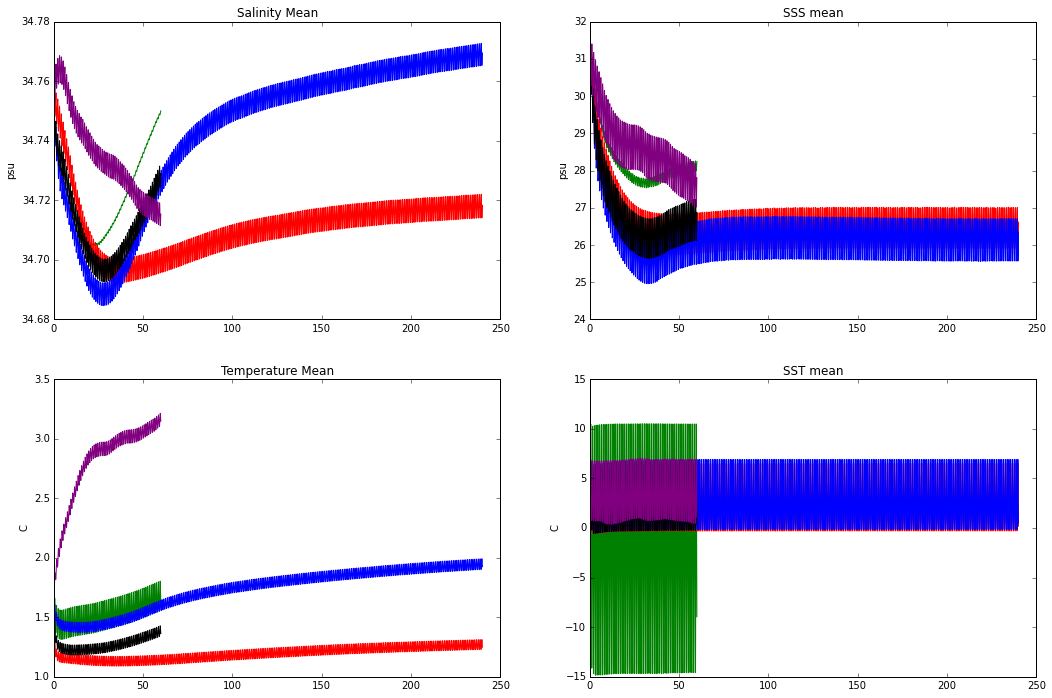

In [50]:
plot_monitor(monitor_list1,['salt_mean','sss_mean','theta_mean','sst_mean'])

no seaice green
sponge 1m timescale scaled obcs red
no sponge blue
sponge 1y timescale scaled obcs black
sponge 1m timescale noscaled obcs purple


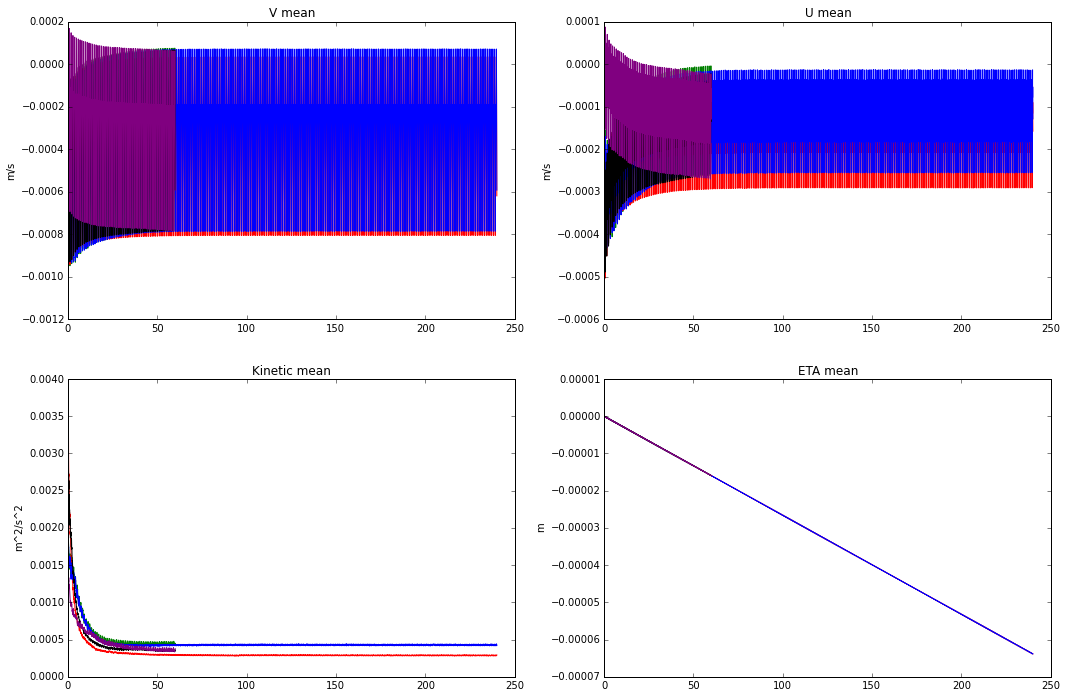

In [51]:
plot_monitor(monitor_list1,['vvel_mean','uvel_mean','ke_mean','eta_mean'])

no seaice green
sponge 1m timescale scaled obcs red
no sponge blue
sponge 1y timescale scaled obcs black
sponge 1m timescale noscaled obcs purple


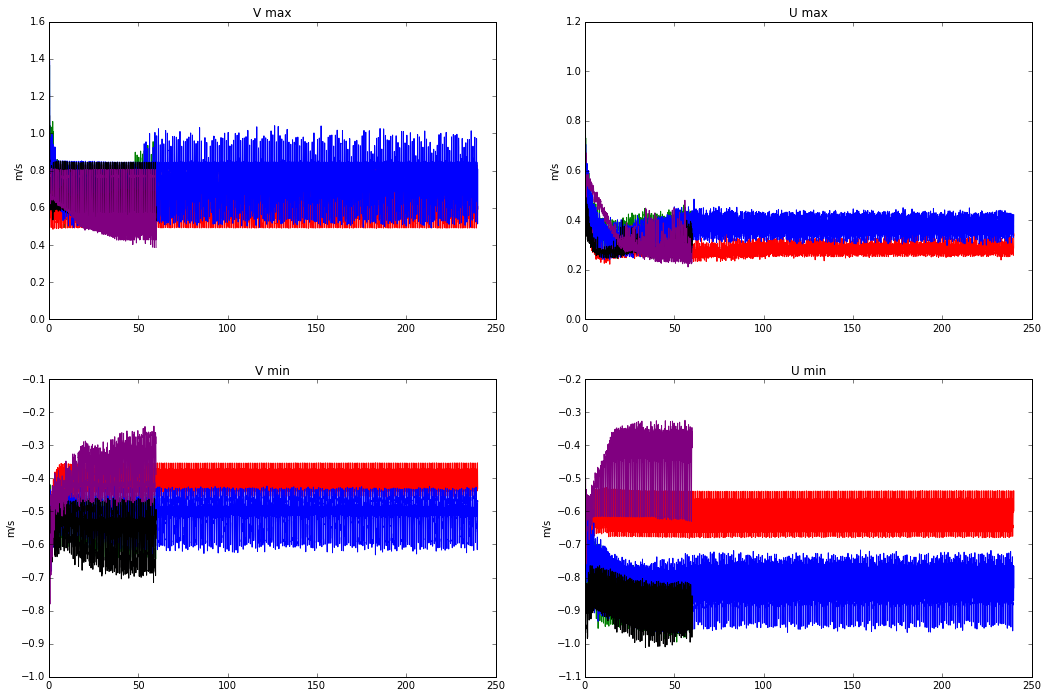

In [52]:
plot_monitor(monitor_list1,['vvel_max','uvel_max','vvel_min','uvel_min'])

no seaice green
sponge 1m timescale scaled obcs red
no sponge blue
sponge 1y timescale scaled obcs black
sponge 1m timescale noscaled obcs purple


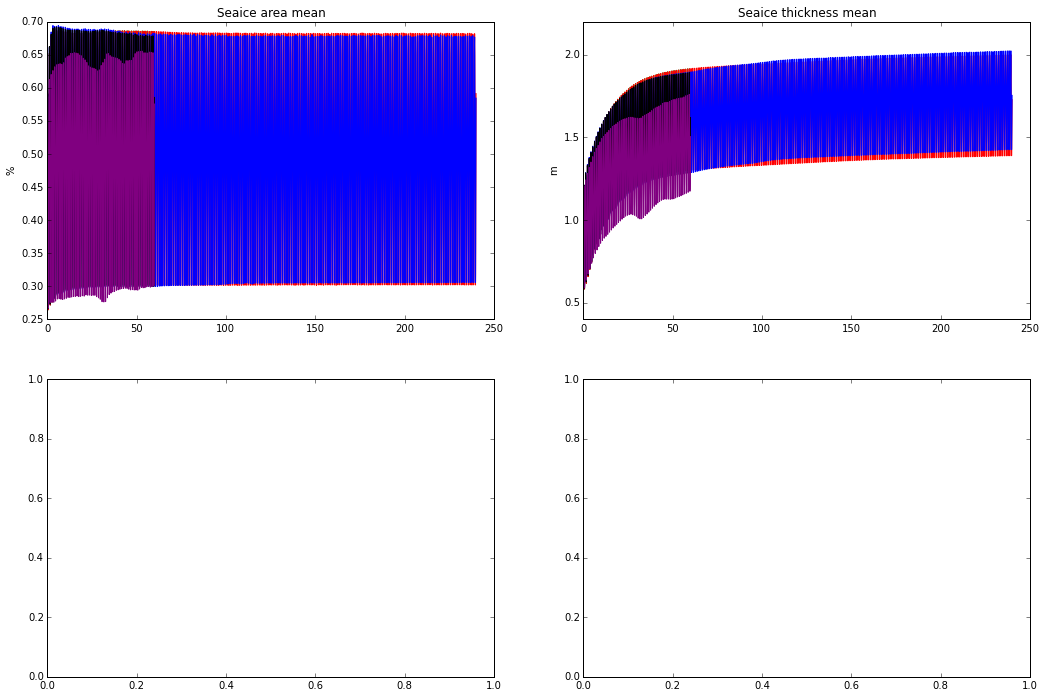

In [53]:
plot_monitor(monitor_list1,['seaice_area_mean','seaice_heff_mean'])

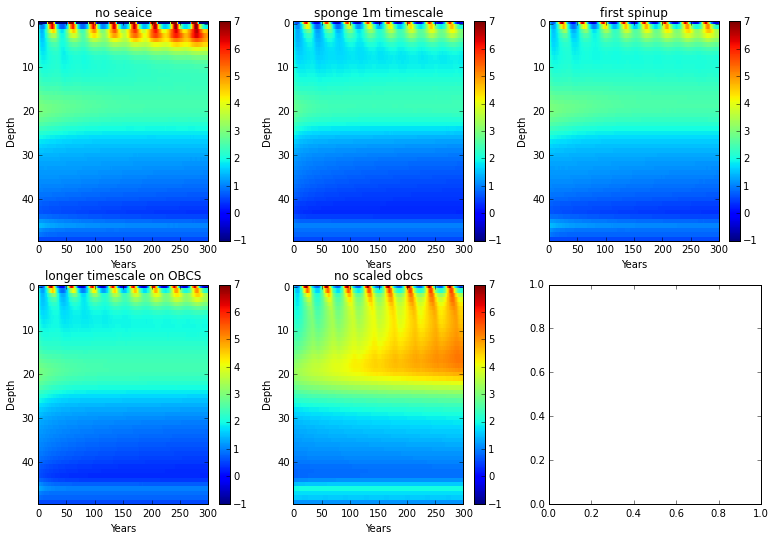

In [54]:
def plot_lv(monitor_list,var,vimin,vimax,cmap,row=2,col=3):
    file2read1 = netcdf.NetCDFFile("/scratch/general/am8e13/results36km/grid.nc",'r')
    Z = file2read1.variables['Zp1']
    Z = Z[0:50]*1
    fig, axes = plt.subplots(nrows=row, ncols=col)
    ax_ind = 0
    for mon in monitor_list:
        #print mon
        ca = axes.flat[ax_ind].imshow(monitor_list[mon].dataDyn[var][0:300,:].T,vmin = vimin, vmax = vimax,\
                    interpolation='nearest', cmap = cmap ,origin='upper', aspect='auto')
        cbar = fig.colorbar(ca , ax=axes.flat[ax_ind], )
        axes.flat[ax_ind].set_title(titles_lv[mon])
        axes.flat[ax_ind].set_xlabel('Years')
        axes.flat[ax_ind].set_ylabel('Depth')
        ax_ind += 1
    fig.subplots_adjust(right=1.8,top=1.8)
plot_lv(monitor_list1,'theta_lv_mean',-1,7,matplotlib.cm.jet)

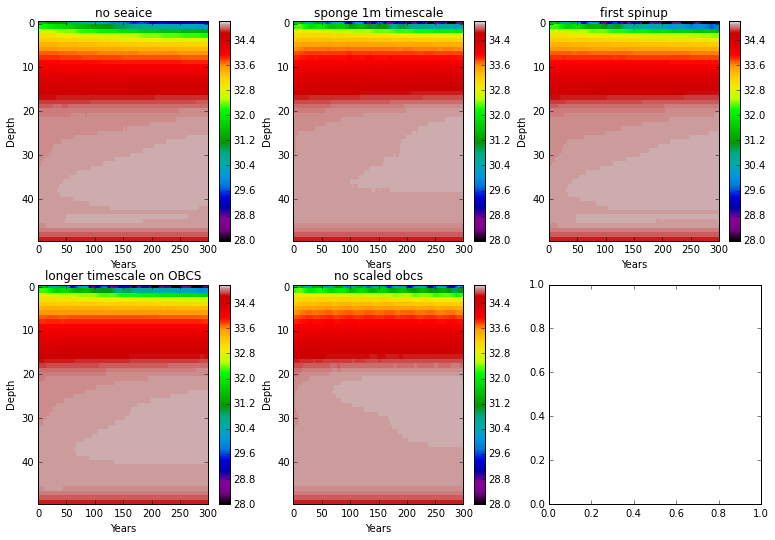

In [55]:
plot_lv(monitor_list1,'salt_lv_mean',28,35,matplotlib.cm.nipy_spectral)

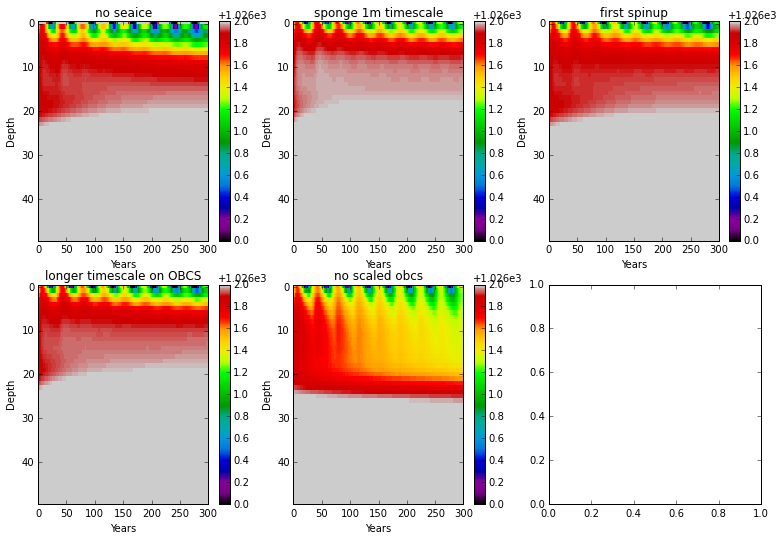

In [56]:
plot_lv(monitor_list1,'rho_lv_mean',1026,1028,matplotlib.cm.nipy_spectral)

In [57]:
NCEP = read_forcing('/scratch/general/am8e13/NCEP_data/','cube78_',1992,16)   
ERA = read_forcing('/scratch/general/am8e13/ERA_data/','ERA40g_',1979,23)
JRA = read_forcing('/scratch/general/am8e13/cs_36km_tutorial/climdata/','jra25_',1979,24)
titles, unity = dataset_unity()

read cube78_
read ERA40g_
read jra25_


ERA in black with average in red
JRA in blue with average in yellow
NCEP in green with average in orange


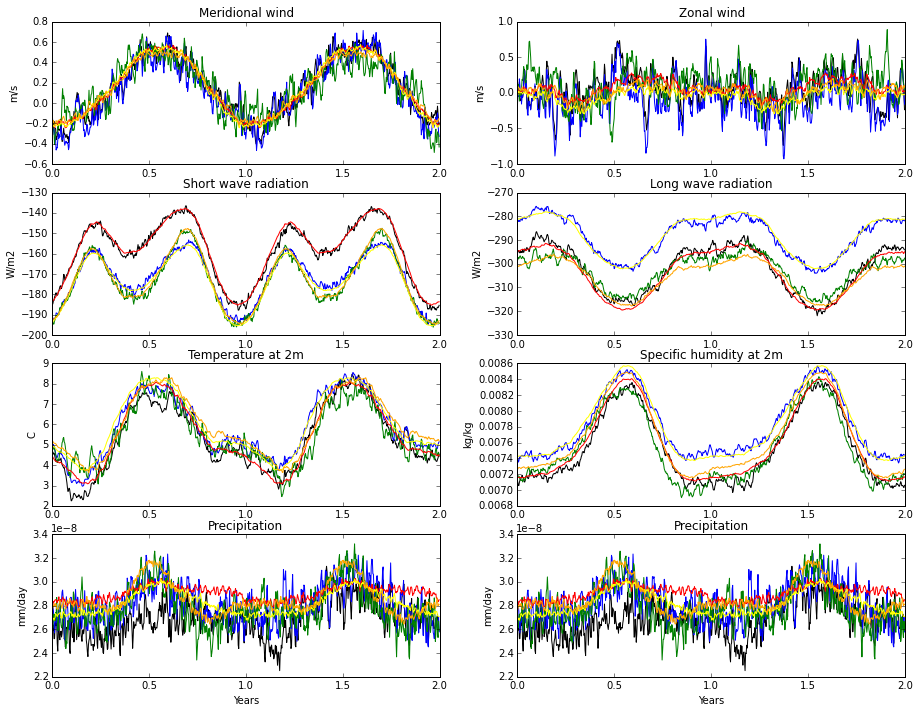

In [58]:
fig, axes = plt.subplots(4,2)
yp =2
ax_ind = 0
ord_var = ['v10m','u10m','dsw','dlw','tmp2m_degC','spfh2m','rain','rain']
time = np.array(range(len(ERA['data']['v10m'])))/360.

for var in ord_var:
    if var == 'rain' or var == 'rain_new33':
        axes.flat[ax_ind].set_xlabel('Years')
    if var == 'rain_ne3':
        var='Et'
    else:        
        axes.flat[ax_ind].plot(time[0:360*yp],ERA['data'][var][0:360*yp],'black')
        axes.flat[ax_ind].plot(time[0:360*yp],JRA['data'][var][0:360*yp],'blue')
        axes.flat[ax_ind].plot(time[0:360*yp],NCEP['data'][var][0:360*yp],'green')
        axes.flat[ax_ind].plot(time[0:360*yp],ERA['data_ave'][var][0:360*yp],'red')
        axes.flat[ax_ind].plot(time[0:360*yp],JRA['data_ave'][var][0:360*yp],'yellow')
        axes.flat[ax_ind].plot(time[0:360*yp],NCEP['data_ave'][var][0:360*yp],'orange')
        axes.flat[ax_ind].set_title(titles[var])
        axes.flat[ax_ind].set_ylabel(unity[var])
        ax_ind +=  1
    #yp = 4

print 'ERA in black with average in red'
print 'JRA in blue with average in yellow'
print 'NCEP in green with average in orange'
fig.subplots_adjust(right=2.1,top=2.4)

In [60]:
obcs_no = Obcs()
obcs_no.ReadData('/hpcdata/scratch/am8e13/cs_36km_tutorial/obcsdata/newdownloaded/',12,'',36)
obcs1 = Obcs()
obcs1.ReadData('/hpcdata/scratch/am8e13/cs_36km_tutorial/obcsdata/newdownloaded/',12,'_tempmod1',36)
obcs2 = Obcs()
obcs2.ReadData('/hpcdata/scratch/am8e13/cs_36km_tutorial/obcsdata/newdownloaded/',12,'_tempmod2',36)
obcs3 = Obcs()
obcs3.ReadData('/hpcdata/scratch/am8e13/cs_36km_tutorial/obcsdata/newdownloaded/',12,'_tempmod3',36)

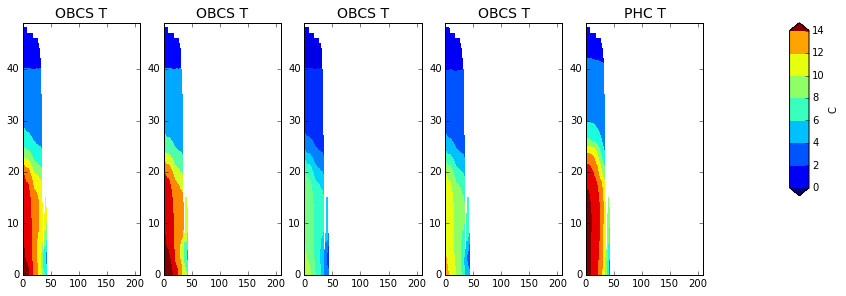

In [61]:
plot_obcs(obcs1,obcs_no,obcs2,obcs3,phc,loc='N',var='T',vmin=-1,vmax=18)

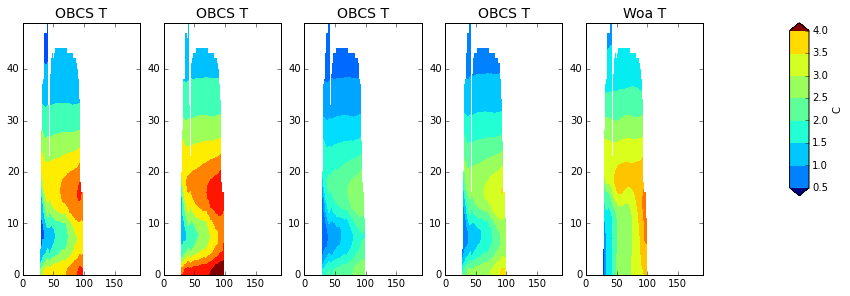

In [62]:
plot_obcs(obcs1,obcs_no,obcs2,obcs3,woa,loc='E',var='T',vmin=-1,vmax=6)

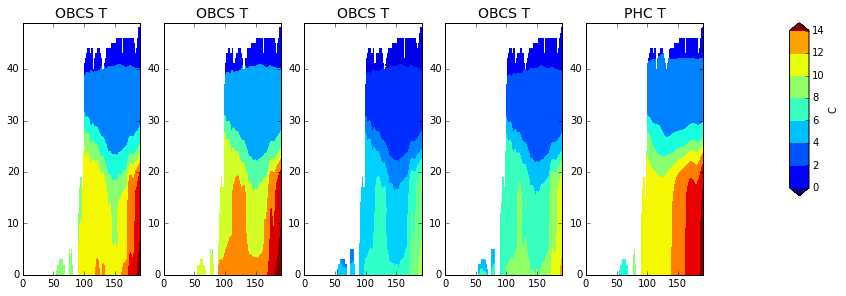

In [63]:
plot_obcs(obcs1,obcs_no,obcs2,obcs3,phc,loc='W',var='T',vmin=-1,vmax=18)